# Module 03: EDA

In [5]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [6]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [7]:
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [8]:
for col in Hitters.columns:
    print(col, Hitters[col].dtypes)

AtBat int64
Hits int64
HmRun int64
Runs int64
RBI int64
Walks int64
Years int64
CAtBat int64
CHits int64
CHmRun int64
CRuns int64
CRBI int64
CWalks int64
League category
Division category
PutOuts int64
Assists int64
Errors int64
Salary float64
NewLeague category


### Before doing any other analyses, let's create training and test sets.

In [9]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

Based on the metadata, the columns with C are numbers gathered from the players career instead of just the numbers from the year 1986.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

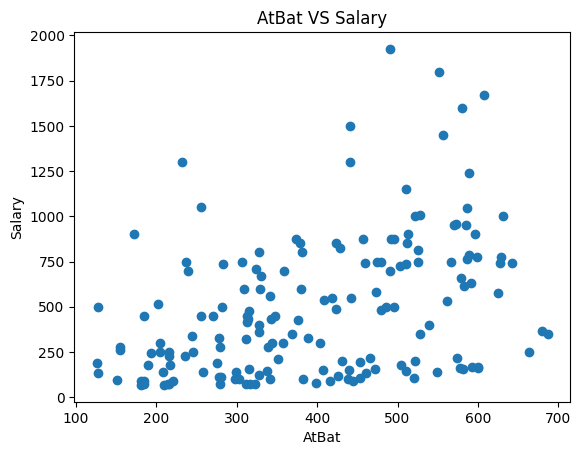

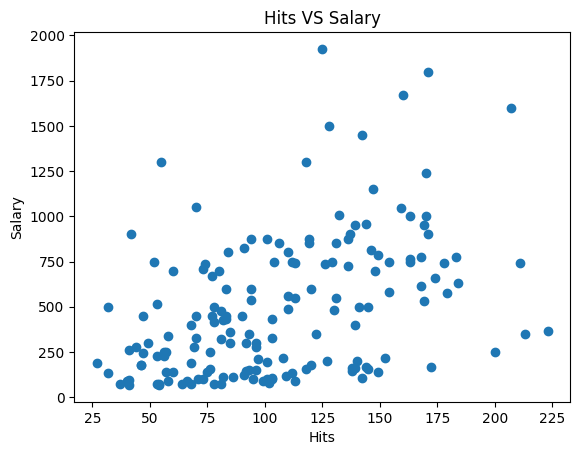

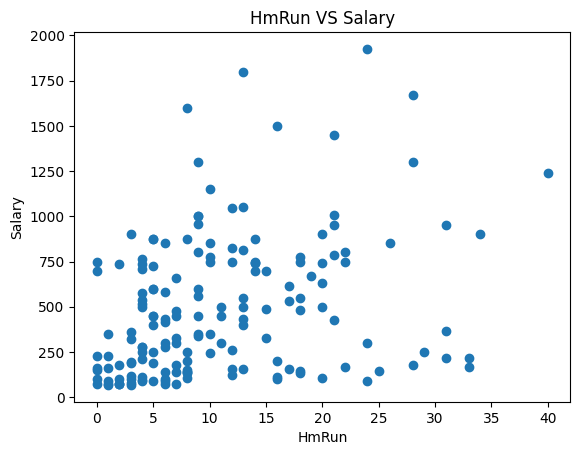

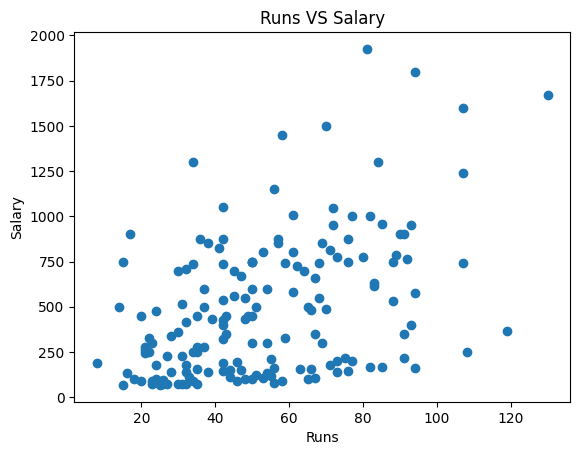

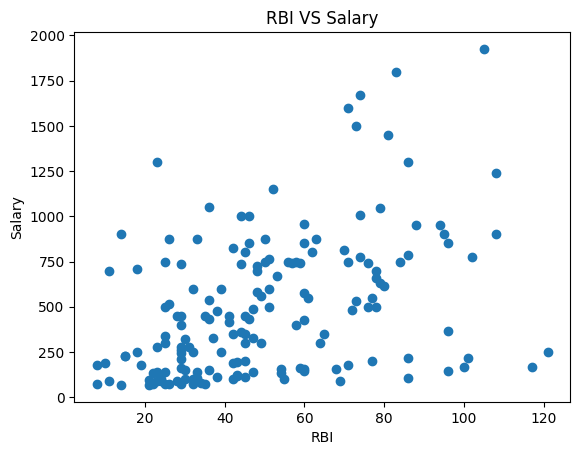

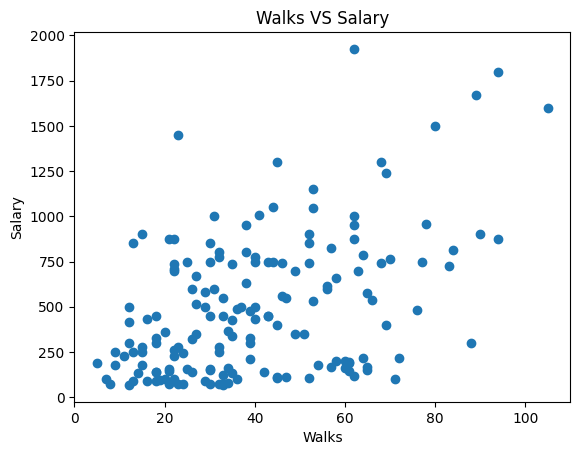

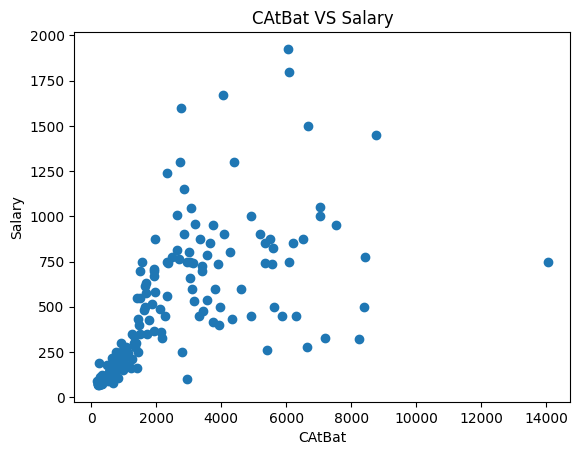

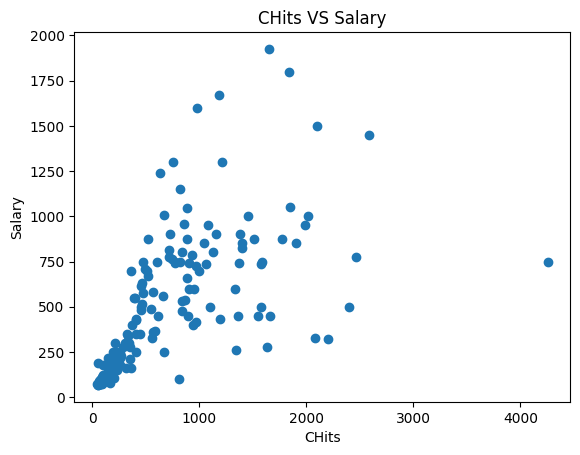

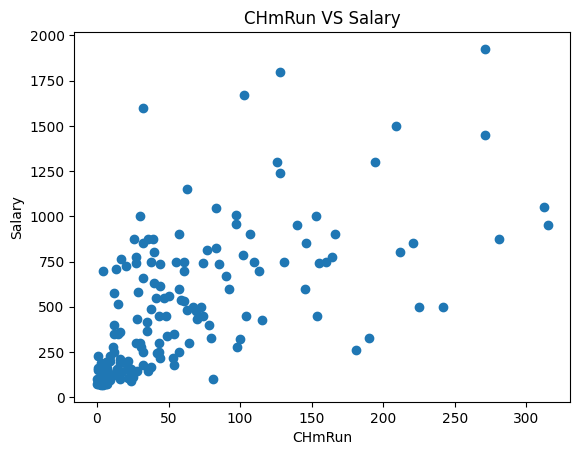

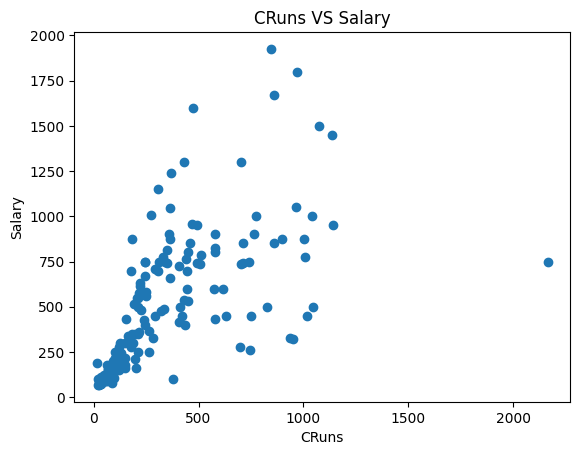

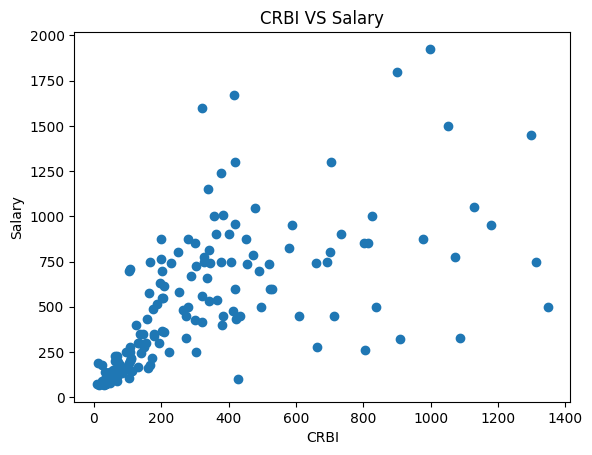

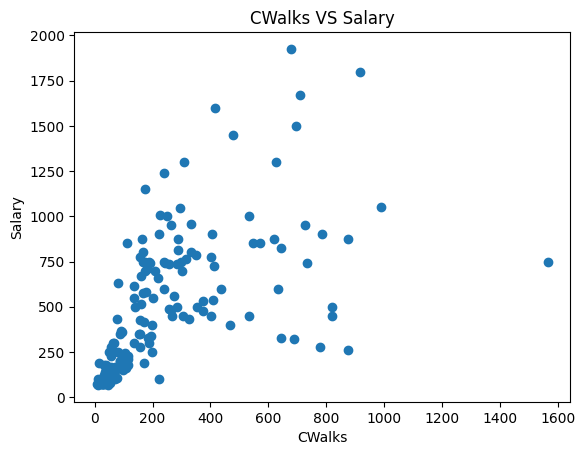

In [10]:
Plots = ["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"]

for num in range(len(Plots)):
    plt.scatter((Train[(Plots[num])]), Train.Salary)
    
    plt.title(Plots[num] + " VS Salary")
    plt.xlabel(Plots[num])
    plt.ylabel("Salary")
    plt.show()

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [11]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

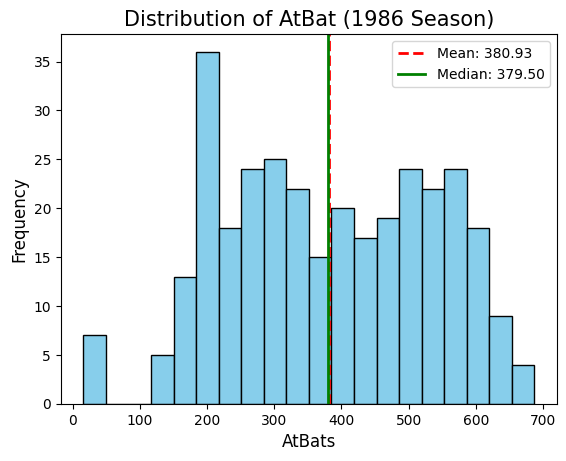

In [12]:
atbat_mean = Hitters['AtBat'].mean()
atbat_median = Hitters['AtBat'].median()

plt.hist(Hitters['AtBat'], bins=20, color='skyblue', edgecolor='black')

plt.axvline(atbat_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {atbat_mean:.2f}')
plt.axvline(atbat_median, color='green', linestyle='solid', linewidth=2, label=f'Median: {atbat_median:.2f}')

plt.title('Distribution of AtBat (1986 Season)', fontsize=15)
plt.xlabel('AtBats', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [ ]:
train_idx, test_idx = train_test_split(Hitters.index, test_size=0.3, random_state=42)
df_train = Hitters.loc[train_idx]

mean_atbat = df_train['AtBat'].mean()
std_atbat = df_train['AtBat'].std()

Hitters['AtBat_st'] = (Hitters['AtBat'] - mean_atbat) / std_atbat

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(Hitters['AtBat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original AtBat Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Hitters['AtBat_st'], bins=20, color='salmon', edgecolor='black')
plt.title('Standardized AtBat_st Distribution')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.show()

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [34]:
within_first_sd = Hitters[Hitters['AtBat_st'].abs() <= 1]

count = len(within_first_sd)

print(f"{count} rows")

189 rows


### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

The count for Salary is far less than everything else, with a count of 263 compared to 322 from everything else.

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

A scenario where the missing results are not reflected is whenever there are placeholders for the variables such as strings.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

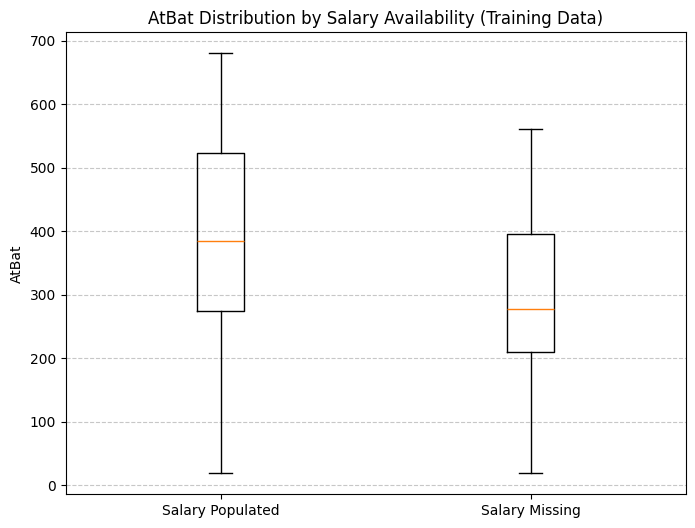

In [20]:
salary_present = df_train[df_train['Salary'].notna()]['AtBat']
salary_missing = df_train[df_train['Salary'].isna()]['AtBat']

plt.figure(figsize=(8, 6))
plt.boxplot([salary_present, salary_missing], tick_labels=['Salary Populated', 'Salary Missing'])
plt.title('AtBat Distribution by Salary Availability (Training Data)')
plt.ylabel('AtBat')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Create a correlation matrix for all numeric features in the training set

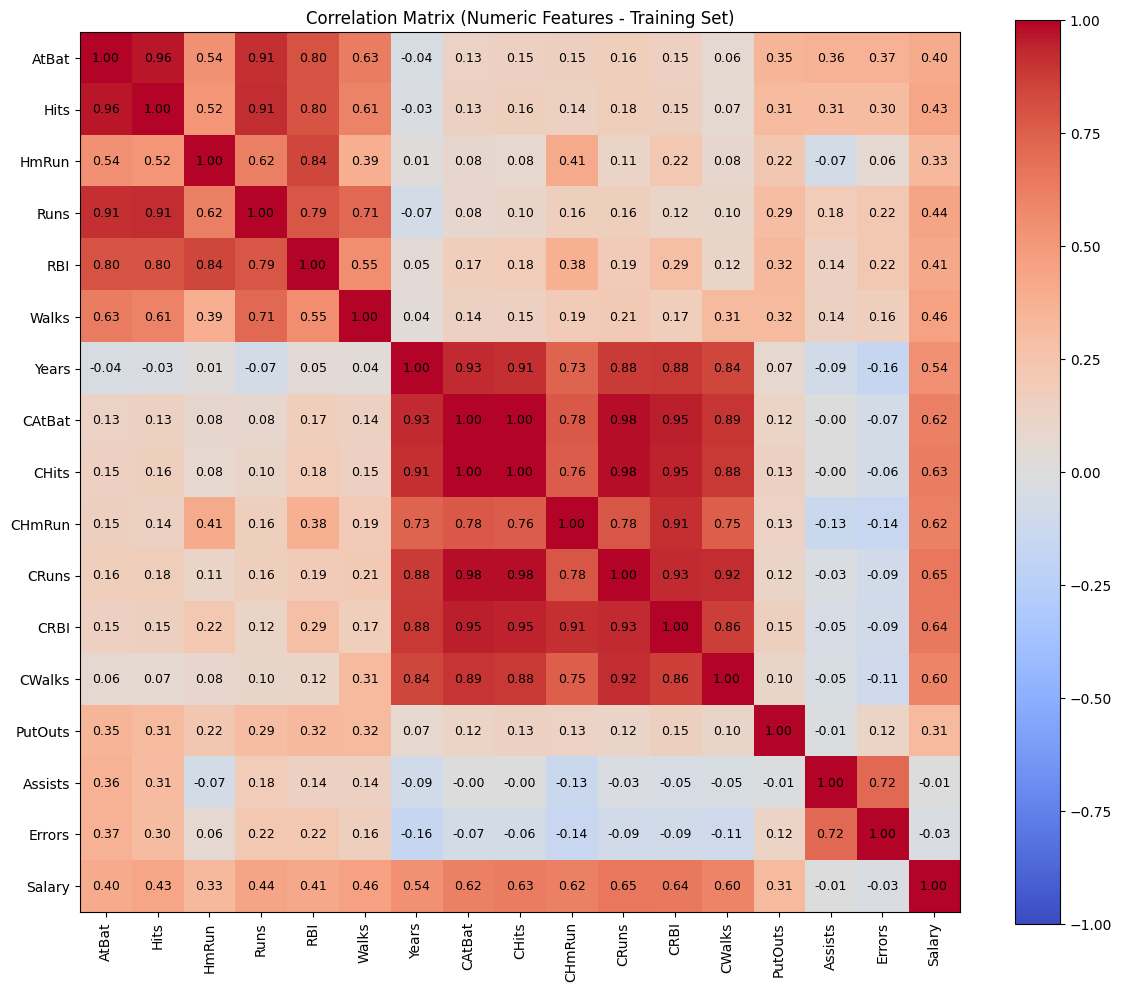

In [21]:
numeric_df = Train.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(im)

# Set the ticks and labels
labels = corr_matrix.columns
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)

# Add correlation values as text inside the boxes
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

ax.set_title("Correlation Matrix (Numeric Features - Training Set)")
plt.tight_layout()
plt.show()

### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

1. Imputation with Boxplots
Instead of replacing all missing salaries with the global median of the entire dataset, we replace the missing value with the median salary of the specific subgroup the player belongs to.
2. Regression Imputation
You build a Linear Regression model where Salary is the target variable, use this model to predict and fill in the missing salary values based on the known values of those predictors for each player.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [22]:
TotHits = Train['Hits'].sum()
TotWalks = Train['Walks'].sum()
TotAtBat = Train['AtBat'].sum()

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

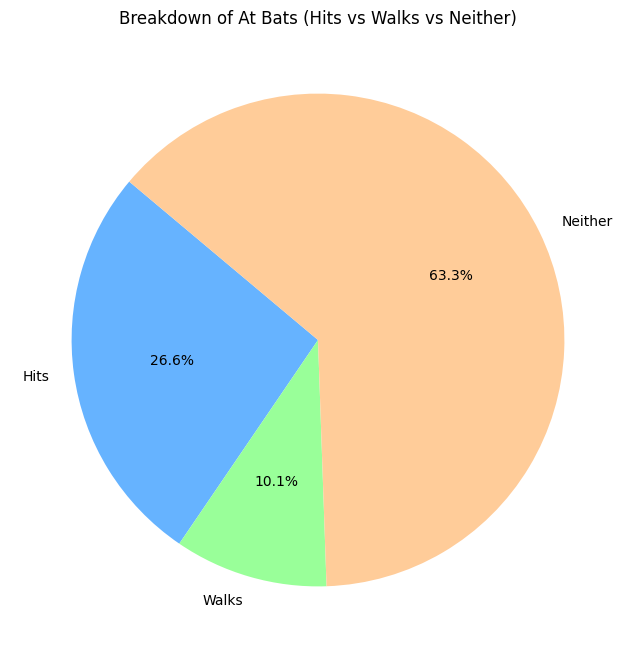

In [23]:
# pie chart
plt.figure(figsize=(8, 8))
plt.pie(Totals, labels=Labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Breakdown of At Bats (Hits vs Walks vs Neither)')
plt.show()

### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [24]:
Train['AVG'] = Train['Hits'] / Train['AtBat']

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [25]:
Train['AVG_bin'] = 'medium'
Train['AVG_bin'] = Train['AVG_bin'].mask(Train['AVG'] < 0.25, 'low')
Train['AVG_bin'] = Train['AVG_bin'].mask(Train['AVG'] > 0.31, 'high')

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

In [26]:
Train['AVG_bin'].value_counts()

AVG_bin
medium    114
low        65
high       14
Name: count, dtype: int64

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [28]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

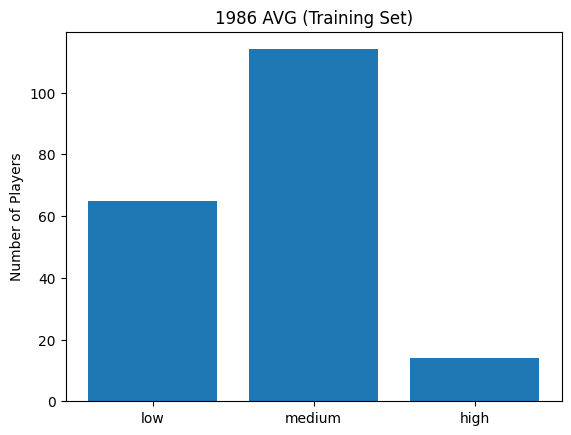

In [29]:
bin_counts = Train['AVG_bin'].value_counts().reindex(['low', 'medium', 'high'])

plt.bar(bin_counts.index, bin_counts.values)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(bin_counts.index)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

The width method was used since we have the boundries of 0.25 and 0.31 rather than by ensuring an equal number of players in each group.